In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 2: Load CSV File
file_path = r"D:\Stock Price Predictor (LSTM) ML project\all_stocks_5yr.csv"
df = pd.read_csv(file_path)
df.head(10)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


In [2]:
# Step 3: Filter for a specific stock (e.g., 'AAL')
stock_name = 'AAL'
stock_df = df[df['Name'] == stock_name].copy()

# Step 4: Parse date and sort
stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df.sort_values('date', inplace=True)

# Step 5: Select only the 'close' column
data = stock_df[['close']].values

# Step 6: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [3]:
# Step 7: Create time series data
def create_dataset(dataset, time_step=60):
    x, y = [], []
    for i in range(time_step, len(dataset)):
        x.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(x), np.array(y)

time_step = 60
x, y = create_dataset(scaled_data, time_step)

# Reshape for LSTM [samples, time steps, features]
x = x.reshape(x.shape[0], x.shape[1], 1) 

In [4]:
# Step 8: Split into train and test sets
split = int(len(x) * 0.8)
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

from keras.layers import Input

model = Sequential([
    Input(shape=(x_train.shape[1], 1)),  # Explicit Input layer
    LSTM(50, return_sequences=True),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error') 

In [5]:
# Step 10: Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Step 11: Make predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
actual = scaler.inverse_transform(y_test.reshape(-1, 1)) 

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.1093 - val_loss: 0.0026
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0082 - val_loss: 0.0041
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0064 - val_loss: 0.0041
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0048 - val_loss: 0.0025
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0041 - val_loss: 0.0023
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0040 - val_loss: 0.0020
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0040 - val_loss: 0.0030
Epoch 9/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0035 - val_loss: 0.0019
Epoch 10/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0041 - val_loss: 0.0019
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


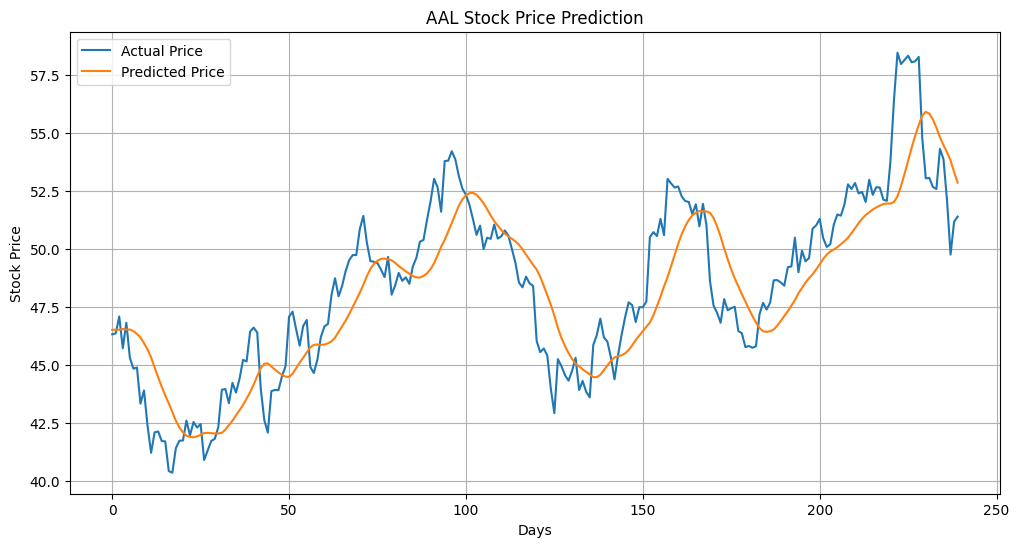

In [6]:
# Step 12: Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(actual, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title(f'{stock_name} Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

In [15]:
#Above is a project and below is a similar project but below is an improved version of the above project


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 1. ডেটা লোডিং এবং প্রিপ্রসেসিং
file_path = "all_stocks_5yr.csv"
df = pd.read_csv(file_path, usecols=['date', 'Name', 'open', 'high', 'low', 'close', 'volume'])
df = df.dropna()
df['date'] = pd.to_datetime(df['date'])
df.sort_values(['Name', 'date'], inplace=True) 

In [7]:
# 2. ফিচার সিলেকশন এবং স্কেলিং
price_features = ['open', 'high', 'low', 'close']
volume_feature = 'volume'

# আলাদা স্কেলার
price_scaler = RobustScaler()
volume_scaler = RobustScaler()

# আলাদাভাবে স্কেলিং
df[price_features] = price_scaler.fit_transform(df[price_features])
df[volume_feature] = volume_scaler.fit_transform(df[[volume_feature]])

# 3. সিকোয়েন্স তৈরি
def create_sequences(data, time_steps=30):
    X, y = [], []
    features = price_features + [volume_feature]
    for stock_name, group in data.groupby('Name'):
        values = group[features].values
        for i in range(time_steps, len(values)):
            X.append(values[i-time_steps:i])
            y.append(values[i, features.index('close')])
    return np.array(X), np.array(y)

X, y = create_sequences(df) 

In [8]:
# 4. ট্রেন-টেস্ট স্প্লিট
split = int(len(X) * 0.8)
x_train, x_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# 5. মডেল তৈরি
model = Sequential([
    LSTM(64, input_shape=(x_train.shape[1], x_train.shape[2])),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# 6. ট্রেনিং
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test)) 

Epoch 1/10


c:\Users\ABDULLAH AL MAHMUD\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15097/15097 ━━━━━━━━━━━━━━━━━━━━ 76s 5ms/step - loss: 0.1478 - val_loss: 7.6790e-04
Epoch 2/10
15097/15097 ━━━━━━━━━━━━━━━━━━━━ 76s 5ms/step - loss: 0.0055 - val_loss: 7.9970e-04
Epoch 3/10
15097/15097 ━━━━━━━━━━━━━━━━━━━━ 78s 5ms/step - loss: 0.0044 - val_loss: 7.2631e-04
Epoch 4/10
15097/15097 ━━━━━━━━━━━━━━━━━━━━ 78s 5ms/step - loss: 0.0034 - val_loss: 8.0444e-04
Epoch 5/10
15097/15097 ━━━━━━━━━━━━━━━━━━━━ 77s 5ms/step - loss: 0.0034 - val_loss: 7.9460e-04
Epoch 6/10
15097/15097 ━━━━━━━━━━━━━━━━━━━━ 79s 5ms/step - loss: 0.0038 - val_loss: 6.7545e-04
Epoch 7/10
15097/15097 ━━━━━━━━━━━━━━━━━━━━ 83s 5ms/step - loss: 0.0034 - val_loss: 8.6263e-04
Epoch 8/10
15097/15097 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - loss: 0.0028 - val_loss: 7.8312e-04
Epoch 9/10
15097/15097 ━━━━━━━━━━━━━━━━━━━━ 74s 5ms/step - loss: 0.0031 - val_loss: 7.0482e-04
Epoch 10/10
15097/15097 ━━━━━━━━━━━━━━━━━━━━ 73s 5ms/step - loss: 0.0036 - val_loss: 6.5476e-04


In [9]:
# 7. প্রেডিকশন এবং ইনভার্স ট্রান্সফর্ম
def inverse_transform_price(values):
    """শুধুমাত্র ক্লোজ প্রাইসের জন্য ইনভার্স ট্রান্সফর্ম"""
    return price_scaler.inverse_transform(
        np.column_stack([np.zeros_like(values)]*3 + [values])
    )[:, -1]

predictions = model.predict(x_test)
predictions_orig = inverse_transform_price(predictions.flatten())
y_test_orig = inverse_transform_price(y_test)

3775/3775 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step


In [ ]:
# 8. Visualization
plt.figure(figsize=(18, 12))

# Plot 1: Training History
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

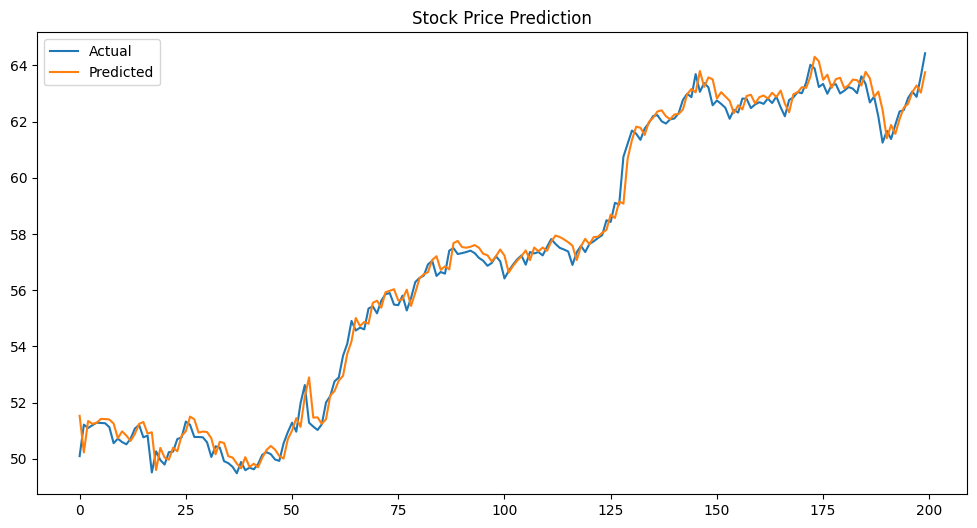

In [10]:
# 8. ভিজ্যুয়ালাইজেশন
plt.figure(figsize=(12, 6))
plt.plot(y_test_orig[:200], label='Actual')
plt.plot(predictions_orig[:200], label='Predicted')
plt.title('Stock Price Prediction')
plt.legend()
plt.show()

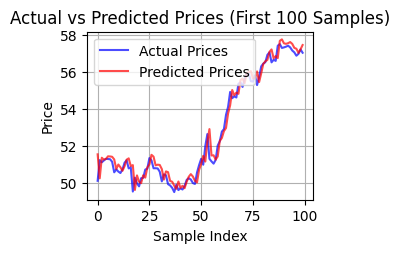

In [11]:
# Plot 2: Actual vs Predicted (First 100 samples)
plt.subplot(2, 2, 2)
plt.plot(y_test_orig[:100], label='Actual Prices', color='blue', alpha=0.7)
plt.plot(predictions_orig[:100], label='Predicted Prices', color='red', alpha=0.7)
plt.title('Actual vs Predicted Prices (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

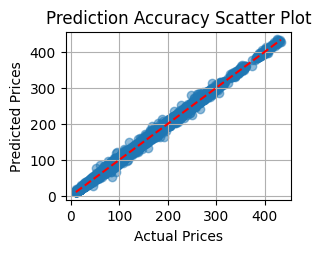

In [12]:
# Plot 3: Scatter Plot of Predictions
plt.subplot(2, 2, 3)
plt.scatter(y_test_orig, predictions_orig, alpha=0.5)
plt.plot([min(y_test_orig), max(y_test_orig)], [min(y_test_orig), max(y_test_orig)], '--r')
plt.title('Prediction Accuracy Scatter Plot')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)

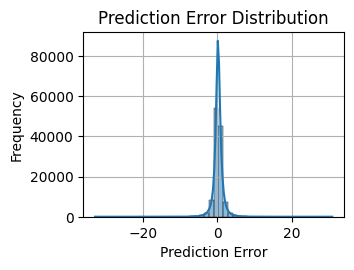

In [13]:
# Plot 4: Error Distribution
import seaborn as sns
plt.subplot(2, 2, 4)
errors = predictions_orig - y_test_orig
sns.histplot(errors, kde=True, bins=50)
plt.title('Prediction Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

In [14]:
# 9. Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_orig, predictions_orig)
rmse = np.sqrt(mean_squared_error(y_test_orig, predictions_orig))

print(f"\nPerformance Metrics:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


Performance Metrics:
MAE: 0.84
RMSE: 1.39
